In [15]:
library(fpp)

In [16]:
# read in the csv file
ds <- read.csv("GotRail.csv", sep=",", header=TRUE)

# use zoo to convert the date "YYYY-MM" to a date
zoo <- read.zoo(ds, sep=",", FUN=as.yearmon)

# us ts to convert the zoo object to ts object using the correct intervals
ts = ts(zoo, frequency=12, start=c(1990,1), end=c(2004, 4))

mn = list(month.abb, unique(floor(time(ts))))
df = as.data.frame(t(matrix(scale(ts), 12, dimnames = mn)))
scale = ts(c(t(df)), start=1990, end=c(2004, 4), freq=12)

Warning message in matrix(scale(ts), 12, dimnames = mn):
“data length [172] is not a sub-multiple or multiple of the number of rows [12]”

In [17]:
aa_fit = auto.arima(scale, approximation=FALSE, trace=FALSE)
summary(aa_fit)

Series: scale 
ARIMA(3,1,0)(1,0,0)[12]                    

Coefficients:
          ar1      ar2      ar3    sar1
      -0.3399  -0.2137  -0.1513  0.8586
s.e.   0.0760   0.0789   0.0772  0.0345

sigma^2 estimated as 0.1671:  log likelihood=-95.74
AIC=201.48   AICc=201.84   BIC=217.18

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.002843425 0.4027368 0.2950878 15.18582 119.1945 0.7827356
                    ACF1
Training set -0.01141834


In [18]:
future = forecast(aa_fit, 48)

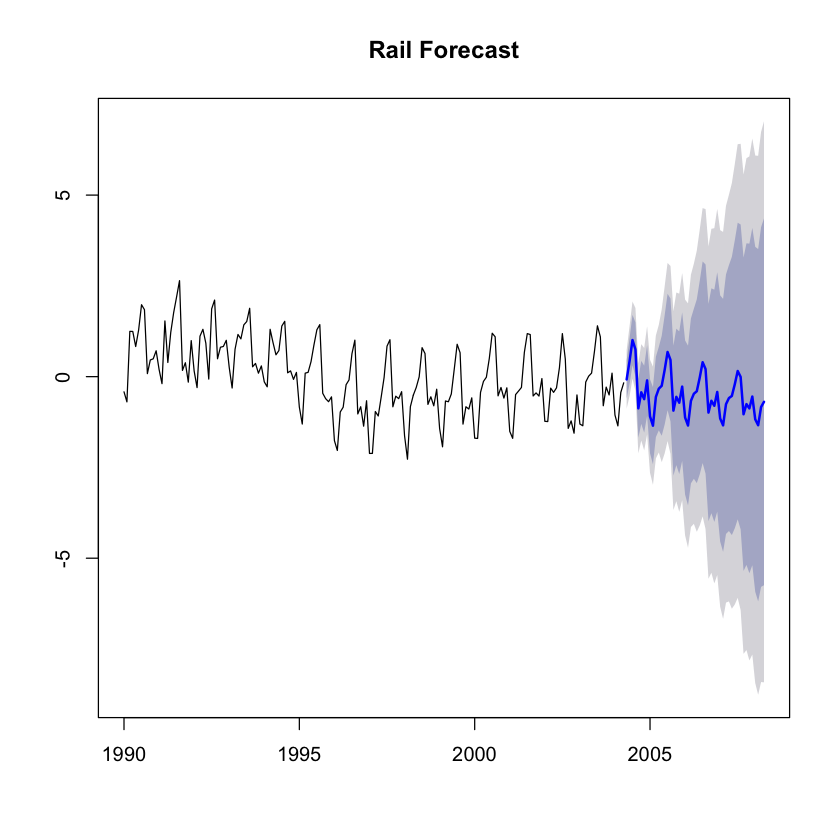

In [19]:
plot(future, main="Rail Forecast")